In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_load = "resources/LandfillData.csv"

In [4]:
landfill_data = pd.read_csv(file_load)
landfill_data.head()

,GHGRP ID,Landfill ID,Landfill Name,State,Landfill Alias,Physical Address,City,County,Zip Code,Latitude,...,LFG Generated (mmscfd),LFG Collection System In Place?,LFG Collected (mmscfd),LFG Collected Year,Percent Methane,Flares in Place?,Number of Flares,LFG Flared (mmscfd),LFG Flared Year,Gas Collection System Comments
0,1007341.0,1994,Anchorage Regional Landfill,AK,NaN,15500 E. Eagle River Loop Road,Eagle River,Anchorage,99577,61.293281,...,7.330,Yes,3.383,2019.0,51.0,Yes,1.0,NaN,NaN,4/10-GCCS in operation since Oct. 2006.; 2010-...
1,1010389.0,11941,Capitol Disposal Landfill,AK,NaN,5600 Tonsgard Court,Juneau,Juneau,99801,58.352800,...,NaN,Yes,0.709,2019.0,23.3,Yes,1.0,0.709,2019.0,"9/10-16 wells over 13 acres, system installed ..."
2,1005349.0,12216,Central Peninsula Landfill (CPL),AK,Soldotna Landfill; Central Peninsula Baling Fa...,46915 Sterling Highway,Soldotna,Kenai Peninsula,99669,60.447140,...,0.657,No,NaN,NaN,NaN,No,NaN,NaN,NaN,2010-Passive venting.
3,NaN,10960,Kodiak Island Borough Landfill,AK,NaN,1203 Monashka Bay Road,Kodiak,Kodiak Island,99615,57.808740,...,NaN,No,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN
4,1004380.0,11020,Merrill Field Landfill,AK,NaN,800 Merrill Field Drive,Anchorage,Anchorage,99501,61.212660,...,0.590,Yes,0.148,2019.0,33.4,Yes,1.0,0.148,2019.0,"2012-30 wells, system capacity=500 acfm."


In [5]:
landfill_data.columns

Index(['GHGRP ID', 'Landfill ID', 'Landfill Name', 'State', 'Landfill Alias',
       'Physical Address', 'City', 'County', 'Zip Code', 'Latitude',
       'Longitude', 'Composting?', 'Ownership Type',
       'Landfill Owner Organization(s)', 'Landfill Operator Organization',
       'Year Landfill Opened', 'Landfill Closure Year',
       'Current Landfill Status', 'Design Landfill Area (acres)',
       'Current Landfill Area (acres)', 'Design Landfill Depth (feet)',
       'Current Landfill Depth (feet)', 'Landfill Design Capacity (tons)',
       'Waste in Place (tons)', 'Waste in Place Year',
       'Annual Waste Acceptance Rate (tons per year)',
       'Annual Waste Acceptance Year', 'Does LF Recirculate Leachate?',
       'Leachate Recirc Frequency (Past 10 Yrs)', 'Permitted as RD&D LF?',
       'LFG Generated (mmscfd)', 'LFG Collection System In Place?',
       'LFG Collected (mmscfd)', 'LFG Collected Year', 'Percent Methane',
       'Flares in Place?', 'Number of Flares', 'LFG Flare

In [6]:
cleaned_df = landfill_data[["State", "Landfill Name",
                           "Current Landfill Status", "Latitude", "Longitude"]]
cleaned_df.head(15)

,State,Landfill Name,Current Landfill Status,Latitude,Longitude
0,AK,Anchorage Regional Landfill,Open,61.293281,-149.602138
1,AK,Capitol Disposal Landfill,Open,58.352800,-134.494700
2,AK,Central Peninsula Landfill (CPL),Open,60.447140,-151.103690
3,AK,Kodiak Island Borough Landfill,Closed,57.808740,-152.407610
4,AK,Merrill Field Landfill,Closed,61.212660,-149.840120
5,AK,Palmer Central Landfill,Open,61.590000,-149.210000
6,AK,South Cushman Landfill,Open,64.804760,-147.700850
7,AK,Unalaska Landfill,Closed,53.884630,-166.506570
8,AL,Arrowhead Landfill,Open,32.413000,-87.468500
9,AL,Athens/Limestone County SLF MSWLF,Closed,34.763400,-86.939900


In [7]:
open_landfill_df = cleaned_df.loc[cleaned_df['Current Landfill Status'].isin(['Open'])]
open_landfill_df.head(10)

,State,Landfill Name,Current Landfill Status,Latitude,Longitude
0,AK,Anchorage Regional Landfill,Open,61.293281,-149.602138
1,AK,Capitol Disposal Landfill,Open,58.352800,-134.494700
2,AK,Central Peninsula Landfill (CPL),Open,60.447140,-151.103690
5,AK,Palmer Central Landfill,Open,61.590000,-149.210000
6,AK,South Cushman Landfill,Open,64.804760,-147.700850
8,AL,Arrowhead Landfill,Open,32.413000,-87.468500
11,AL,Black Warrior Solid Waste Facility,Open,33.243140,-87.665850
13,AL,Brundidge Landfill,Open,31.704100,-85.829900
15,AL,Cedar Hill Landfill,Open,33.683450,-86.252720
16,AL,Chastang SLF,Open,31.061790,-88.025030


In [8]:
open_landfill_df.to_csv("resources/openlandfills.csv", index = False)

In [9]:
grouped_df = open_landfill_df.groupby("State").nunique()
del grouped_df["Current Landfill Status"]
del grouped_df["Latitude"]
del grouped_df["Longitude"]
per_state_df = grouped_df.rename(columns = {"Landfill Name":"Landfills Per State"})
per_state_df.head(10)

,Landfills Per State
State,
AK,5
AL,29
AR,22
AZ,24
CA,116
CO,26
CT,1
DE,3
FL,38


In [10]:
sorted_states = per_state_df.sort_values("Landfills Per State", ascending = False)
sorted_states.head(15)

,Landfills Per State
State,
CA,116
TX,89
KS,49
MI,46
GA,44
VA,43
PA,41
IA,40
NC,40


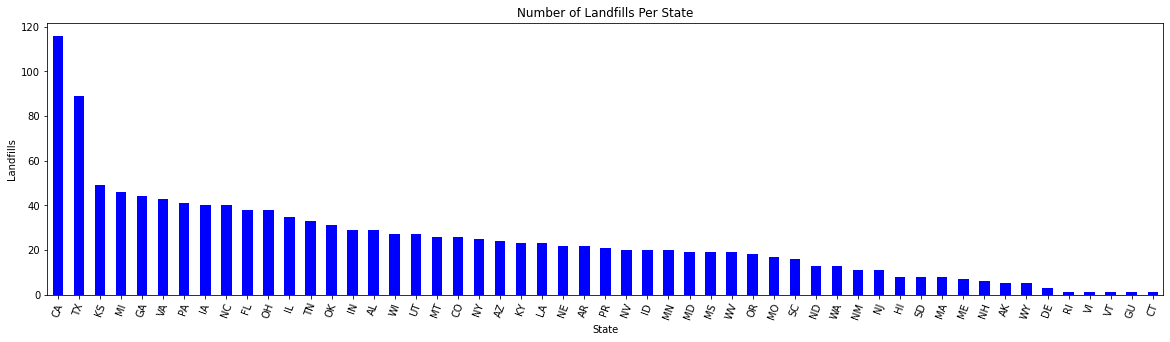

In [18]:
landfills = sorted_states["Landfills Per State"]
landfills.plot.bar(rot = 70, color = "blue")
plt.title ('Number of Landfills Per State')
plt.xlabel('State')
plt.ylabel('Landfills')
plt.rcParams['figure.figsize'] = (15,5)
plt.show()

In [20]:
plt.savefig("Images/landfillsperstate.png", transparent=False)

<Figure size 1080x360 with 0 Axes>